In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
#@title Plotting Functions

def plot_observed_vs_predicted(x, y, y_hat, theta_hat):
  """ Plot observed vs predicted data

  Args:
    x (ndarray): observed x values
    y (ndarray): observed y values
    y_hat (ndarray): predicted y values
    theta_hat (ndarray):
  """
  fig, ax = plt.subplots()
  ax.scatter(x, y, label='Observed')  # our data scatter plot
  ax.plot(x, y_hat, color='r', label='Fit')  # our estimated model
  # plot residuals
  ymin = np.minimum(y, y_hat)
  ymax = np.maximum(y, y_hat)
  ax.vlines(x, ymin, ymax, 'g', alpha=0.5, label='Residuals')
  ax.set(
      title=fr"$\hat{{\theta}}$ = {theta_hat:0.2f}, MSE = {np.mean((y - y_hat)**2):.2f}",
      xlabel='x',
      ylabel='y'
  )
  ax.legend()

In [90]:
aData = pd.read_csv("data/EEG_data.csv")
aData

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,9.0,9.0,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0,1.0,0.0
12807,9.0,9.0,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0,1.0,0.0
12808,9.0,9.0,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0,1.0,0.0
12809,9.0,9.0,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0,1.0,0.0


29724.211553473848

videoId:  1 	mean:  50741.32390381896

videoId:  2 	mean:  45711.39638932496

videoId:  3 	mean:  39207.293532338306

videoId:  4 	mean:  54195.83849557522

videoId:  5 	mean:  33429.015447154474

videoId:  6 	mean:  34112.49703640982

videoId:  7 	mean:  24796.997451146985

videoId:  8 	mean:  30126.49453125

videoId:  9 	mean:  29724.211553473848
[50741.32390382 45711.39638932 39207.29353234 54195.83849558
 33429.01544715 34112.49703641 24796.99745115 30126.49453125
 29724.21155347]


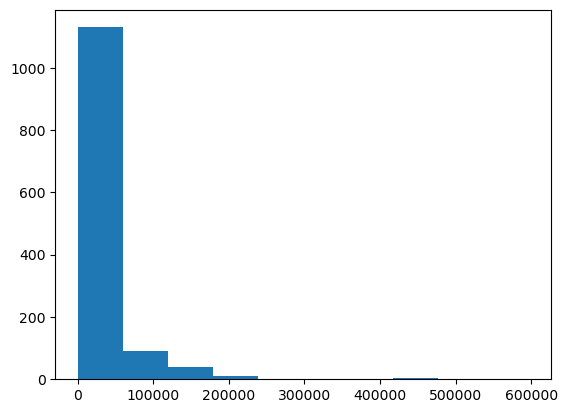

In [91]:
df_0 = aData[aData['VideoID'] == 9]
df_0

df_0_Beta2 = np.array(df_0['Beta2'])
df_0_Beta2Average = np.mean(df_0_Beta2)

plt.hist(df_0_Beta2)
print(df_0_Beta2Average)

y = np.array([])

videoId = 1
while videoId <=9:
    arr = aData[aData['VideoID'] == videoId]
    arrC = np.array(arr['Beta2'])
    mean = np.average(arrC)
    print("\nvideoId: ",videoId, "\tmean: ", mean)
    y = np.append(y,mean)
    videoId+=1


print(y)



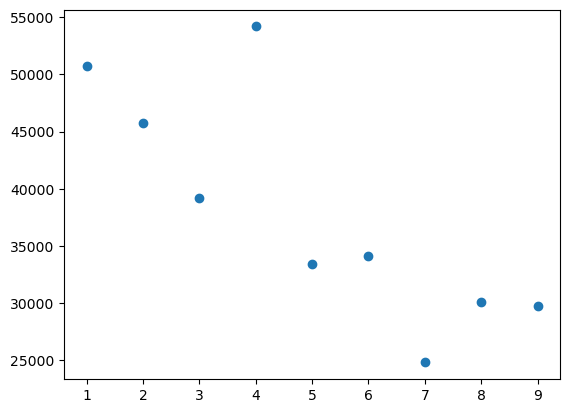

In [92]:
x = np.array([1,2,3,4,5,6,7,8,9])
plt.scatter(x,y)


In [93]:
def compute_cost(x, y, w, b): 
    m = x.shape[0]

    costSum = 0

    f_wb = w * x + b
    cost = np.sum((f_wb - y) ** 2)

    totalCost =(1/(2*m)) * cost

    return totalCost


compute_cost(x,y,50000,1000)

32061160337.56479

In [117]:
def mse(x,y, theta):
    y_hat = x * theta
    mse = np.mean((y - y_hat) ** 2)

    return mse


theta_hats = [-5379, 1.0, -1.5]
for theta_hat in theta_hats:
  print(f"theta_hat of {theta_hat} has an MSE of {mse(x, y, theta_hat):.2f}")

theta_hat of -5379 has an MSE of 4281887712.81
theta_hat of 1.0 has an MSE of 1535860090.21
theta_hat of -1.5 has an MSE of 1536710406.60


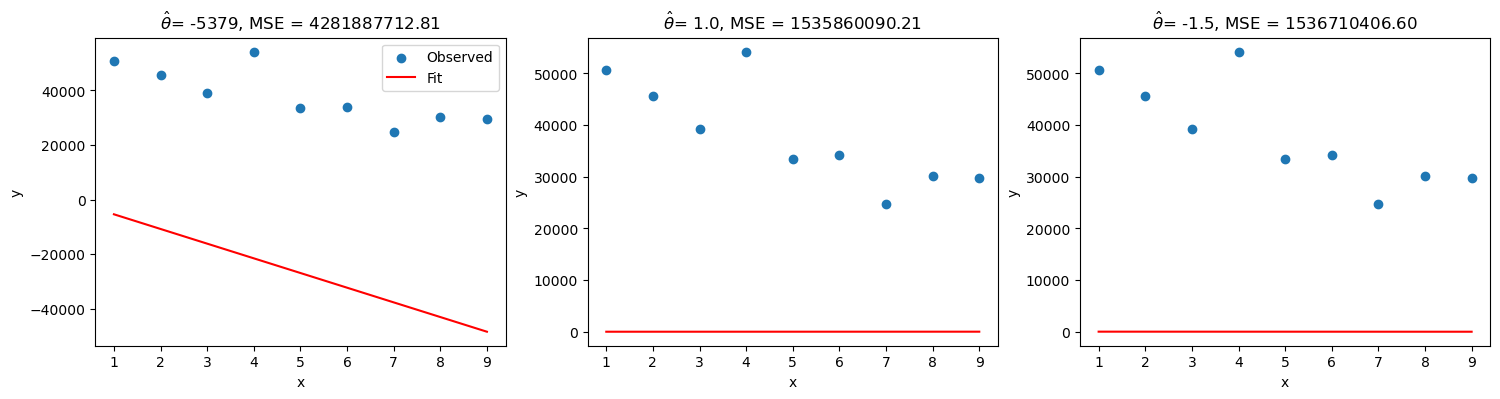

In [118]:
#@title

#@markdown Execute this cell to visualize estimated models

fig, axes = plt.subplots(ncols=3, figsize=(18, 4))
for theta_hat, ax in zip(theta_hats, axes):

  # True data
  ax.scatter(x, y, label='Observed')  # our data scatter plot

  # Compute and plot predictions
  y_hat = theta_hat * x
  ax.plot(x, y_hat, color='r', label='Fit')  # our estimated model

  ax.set(
      title= fr'$\hat{{\theta}}$= {theta_hat}, MSE = {np.mean((y - y_hat)**2):.2f}',
      xlabel='x',
      ylabel='y'
  );

axes[0].legend()

In [95]:
# Least-squares optimization

def solve_normal_eqn(x, y):

    theta_hat = (x.T * y.T) / (x.T*x)

    return theta_hat




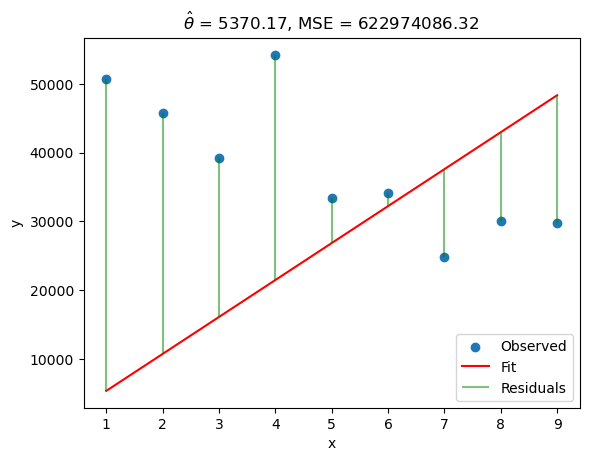

In [120]:
def solve_normal_eqn(x, y):
  """Solve the normal equations to produce the value of theta_hat that minimizes
    MSE.
    Args:
    x (ndarray): An array of shape (samples,) that contains the input values.
    y (ndarray): An array of shape (samples,) that contains the corresponding
      measurement values to the inputs.
  Returns:
    float: the value for theta_hat arrived from minimizing MSE
  """

  # Compute theta_hat analytically
  theta_hat = (x.T @ y) / (x.T @ x)

  return theta_hat


theta_hat = solve_normal_eqn(x, y)
y_hat = theta_hat * x

plot_observed_vs_predicted(x, y, y_hat, theta_hat)


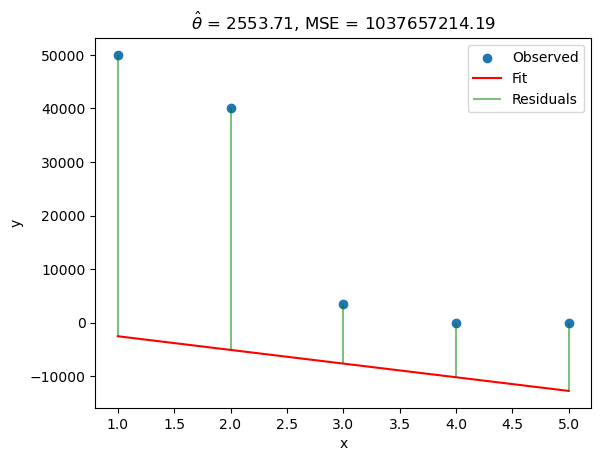

In [106]:
x2 = np.array([1,2,3,4,5])
y2 = np.array([50000,40000,3500,1,-10])

theta_hat = solve_normal_eqn(x2, y2)
y_hat = -theta_hat * x2

plot_observed_vs_predicted(x2, y2, y_hat, theta_hat)